##  Time Series Analysis - Food Loss To Production Ratio
Author: Wenqian Shan

In [1]:
import warnings
import itertools
import matplotlib

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pylab import rcParams

warnings.filterwarnings("ignore")
# plt.style.use('fivethirtyeight')

In [2]:
# default matplotlib color list
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [3]:
# Read in the data
# might need to change the path
csv_path = "./[data]/Ready for use/counts_by_year.csv"
df = pd.read_csv(csv_path)

In [4]:
df.head(5)

,Area,NPL_count_1961,NPL_1961,PL_count_1961,PL_1961,NPP_count_1961,NPP_1961,PP_count_1961,PP_1961,P_ratio_percent_1961,...,NPL_2018,PL_count_2018,PL_2018,NPP_count_2018,NPP_2018,PP_count_2018,PP_2018,P_ratio_percent_2018,NP_ratio_percent_2018,Total_ratio_percent_2018
0,"China, mainland",25.0,12389.0,26.0,18299.0,32.0,205082.0,35.0,327254.0,5.591681,...,51813.0,35.0,161822.0,32.0,1386175.0,35.0,2285834.0,7.079342,3.737840,5.817932
1,Mexico,14.0,1208.0,25.0,1714.0,23.0,20895.0,31.0,53358.0,3.212264,...,10581.0,31.0,10008.0,24.0,84705.0,32.0,217534.0,4.600660,12.491588,6.812159
2,United States of America,14.0,1193.0,21.0,7438.0,30.0,356392.0,29.0,203743.0,3.650678,...,43418.0,30.0,17665.0,31.0,1072379.0,30.0,430471.0,4.103645,4.048755,4.064477
3,Brazil,15.0,3027.0,27.0,18631.0,24.0,39162.0,31.0,189597.0,9.826632,...,20269.0,30.0,182594.0,27.0,266859.0,31.0,1812343.0,10.075024,7.595397,9.756772
4,Japan,17.0,755.0,27.0,3512.0,22.0,32935.0,34.0,57278.0,6.131499,...,1036.0,31.0,4375.0,20.0,28397.0,33.0,53916.0,8.114474,3.648273,6.573688


In [5]:
df.shape

(172, 639)

### 1. Re-organizing Data for Plotting and Forecasting

In [6]:
pr_list = []
npr_list = []
pnpr_list = []
for i in range(1961, 2019, 1):
    pr_list.append("P_ratio_percent_"+ str(i))
    npr_list.append("NP_ratio_percent_"+ str(i))
    pnpr_list.append("Total_ratio_percent_"+ str(i))

In [7]:
pnpr_list[-5:]

['Total_ratio_percent_2014',
 'Total_ratio_percent_2015',
 'Total_ratio_percent_2016',
 'Total_ratio_percent_2017',
 'Total_ratio_percent_2018']

In [8]:
df_use = pd.DataFrame()
df_use["Year"] = list(range(1961, 2019))
# df_use
for country in df.Area:
#     col1 = country + "_P_ratio"
#     col2 = country + "_NP_ratio"
    col3 = country + "_Total_ratio"

#     df_use[col1] = df.loc[df["Area"] == country][pr_list].values.flatten().tolist()
#     df_use[col2] = df.loc[df["Area"] == country][npr_list].values.flatten().tolist()
    df_use[col3] = df.loc[df["Area"] == country][pnpr_list].values.flatten().tolist()
#     if country == 'Dominica':
#         print(df_use[col3])

df_use.tail()

,Year,"China, mainland_Total_ratio",Mexico_Total_ratio,United States of America_Total_ratio,Brazil_Total_ratio,Japan_Total_ratio,Peru_Total_ratio,India_Total_ratio,Argentina_Total_ratio,Spain_Total_ratio,...,Sao Tome and Principe_Total_ratio,Bahamas_Total_ratio,Iceland_Total_ratio,Vanuatu_Total_ratio,Brunei Darussalam_Total_ratio,Djibouti_Total_ratio,Micronesia_Total_ratio,Kiribati_Total_ratio,Maldives_Total_ratio,Antigua and Barbuda_Total_ratio
53,2014,5.956150,6.221510,4.072180,9.852947,6.634577,11.651104,5.391950,2.044404,4.382541,...,12.690355,6.343284,12.500000,7.292954,0.0,7.692308,8.064516,8.064516,0.000000,5.882353
54,2015,5.879590,6.575465,4.006269,9.826888,6.501512,11.750832,5.342469,2.022913,4.486771,...,12.820513,6.273063,11.111111,7.343124,0.0,7.608696,8.000000,8.000000,0.000000,5.882353
55,2016,6.247610,6.596434,4.017429,9.850074,6.630246,11.762541,5.320420,2.025186,4.288951,...,13.106796,6.250000,10.000000,7.351779,0.0,8.421053,7.978723,7.978723,0.000000,5.882353
56,2017,6.210256,6.645356,4.081259,9.740384,6.506666,11.960495,5.526118,1.987725,4.820231,...,12.903226,6.181818,11.111111,7.729008,0.0,7.619048,7.978723,7.978723,16.666667,5.882353
57,2018,5.817932,6.812159,4.064477,9.756772,6.573688,11.881363,5.259963,2.097353,4.245070,...,13.397129,6.227106,0.000000,7.764706,0.0,9.000000,7.936508,7.936508,25.000000,5.555556


In [9]:
# df.loc[df["Area"] == 'Dominica']

In [10]:
df_use.shape

(58, 173)

In [11]:
# df_use[['Year', 'Dominica_Total_ratio']]

In [12]:
pnpr_list[-5:]

['Total_ratio_percent_2014',
 'Total_ratio_percent_2015',
 'Total_ratio_percent_2016',
 'Total_ratio_percent_2017',
 'Total_ratio_percent_2018']

In [13]:
df_pnpr = pd.DataFrame(df[pnpr_list[-5:]].sum(axis=1)/5,columns=['Total_ratio_sum'])
# df_pnpr

In [14]:
df_area = pd.DataFrame(df["Area"])
df_area_pnpr_sort = df_area.join(df_pnpr).sort_values(by=["Total_ratio_sum"], ascending=False)
df_area_pnpr_sort[:5]

,Area,Total_ratio_sum
126,"China, Hong Kong SAR",213.629664
104,United Arab Emirates,37.963487
157,Saint Lucia,26.791323
59,Ghana,21.377738
160,Dominica,21.076650


In [15]:
df_area_pnpr_sort.loc[df_area_pnpr_sort['Total_ratio_sum']!=0.0][-5:]

,Area,Total_ratio_sum
41,Russian Federation,1.720295
40,Romania,1.613017
37,Hungary,1.612482
113,Latvia,1.277018
62,Malaysia,0.933074


## 2. Getting top 5 counties
**Highest/lowest 5 countries based on 2014-2018 total food loss ratio**

In [16]:
high5 = list(df_area_pnpr_sort[:5]['Area'])
high5

['China, Hong Kong SAR',
 'United Arab Emirates',
 'Saint Lucia',
 'Ghana',
 'Dominica']

In [17]:
low5 = list(df_area_pnpr_sort.loc[df_area_pnpr_sort['Total_ratio_sum']!=0.0][-5:]['Area'])
low5

['Russian Federation', 'Romania', 'Hungary', 'Latvia', 'Malaysia']

In [18]:
def add_postfix(list1, add_string):
    res = []
    for i in range(len(list1)):
        res.append(list1[i]+add_string)
    return res    

In [19]:
high5_add = add_postfix(high5, "_Total_ratio")
high5_add

['China, Hong Kong SAR_Total_ratio',
 'United Arab Emirates_Total_ratio',
 'Saint Lucia_Total_ratio',
 'Ghana_Total_ratio',
 'Dominica_Total_ratio']

In [20]:
low5_add = add_postfix(low5, "_Total_ratio")
low5_add

['Russian Federation_Total_ratio',
 'Romania_Total_ratio',
 'Hungary_Total_ratio',
 'Latvia_Total_ratio',
 'Malaysia_Total_ratio']

### 3. Plotting Data

In [25]:
def plot_ratio(df_use, col_names=["Brazil_P_ratio", "Brazil_NP_ratio"], savepic='', savefig=''):
    x = df_use['Year']
    plt.figure(figsize=(9, 3))

    for col_name in col_names:
        y = df_use[col_name]
        plt.plot(x, y, label=col_name[:-12])

    # Start plotting
    plt.xticks(np.arange(1961, 2019, 3))
    plt.xlabel("Year")
    plt.ylabel("Ratio (%)")
    plt.xlim([1961, 2018])
    
    flag_name = None
    flag = col_names[0].split('_')[1]
    if flag == "P":
        flag_name = "Perishable"
    elif flag == "NP":
        flag_name = "Non-perishable"
    else:
        flag_name = flag
        
    plt.title("Plot for Food Loss To Production Ratio (%) ({})".format(savepic.replace('_',' ')))
#     plt.legend(loc='upper left', bbox_to_anchor = (1, 1))
    plt.legend()
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.tight_layout()
    plt.savefig("./[fig]/{}_Plot.png".format(savepic))
    plt.show()

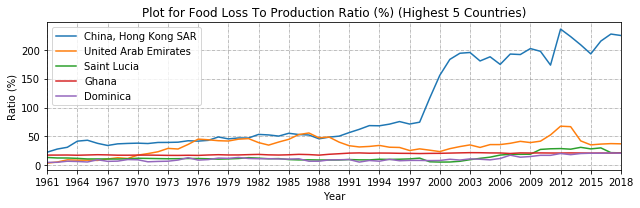

In [26]:
plot_ratio(df_use, high5_add,'Highest_5_Countries')

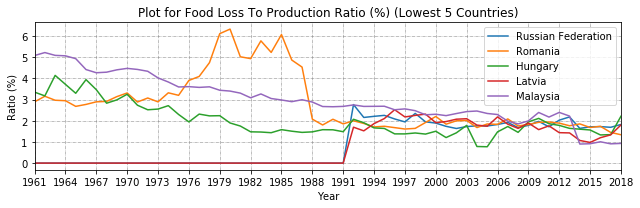

In [27]:
plot_ratio(df_use, low5_add, 'Lowest_5_Countries')

### 3. Plotting and Forecasting

In [28]:
# Data for forecasting
df_use_f = df_use.copy()
df_use_f["Year_Datetime"] = pd.to_datetime(df_use_f["Year"], format='%Y')
df_use_f = df_use_f.set_index("Year_Datetime")
df_use_f.tail()

,Year,"China, mainland_Total_ratio",Mexico_Total_ratio,United States of America_Total_ratio,Brazil_Total_ratio,Japan_Total_ratio,Peru_Total_ratio,India_Total_ratio,Argentina_Total_ratio,Spain_Total_ratio,...,Sao Tome and Principe_Total_ratio,Bahamas_Total_ratio,Iceland_Total_ratio,Vanuatu_Total_ratio,Brunei Darussalam_Total_ratio,Djibouti_Total_ratio,Micronesia_Total_ratio,Kiribati_Total_ratio,Maldives_Total_ratio,Antigua and Barbuda_Total_ratio
Year_Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014,5.956150,6.221510,4.072180,9.852947,6.634577,11.651104,5.391950,2.044404,4.382541,...,12.690355,6.343284,12.500000,7.292954,0.0,7.692308,8.064516,8.064516,0.000000,5.882353
2015-01-01,2015,5.879590,6.575465,4.006269,9.826888,6.501512,11.750832,5.342469,2.022913,4.486771,...,12.820513,6.273063,11.111111,7.343124,0.0,7.608696,8.000000,8.000000,0.000000,5.882353
2016-01-01,2016,6.247610,6.596434,4.017429,9.850074,6.630246,11.762541,5.320420,2.025186,4.288951,...,13.106796,6.250000,10.000000,7.351779,0.0,8.421053,7.978723,7.978723,0.000000,5.882353
2017-01-01,2017,6.210256,6.645356,4.081259,9.740384,6.506666,11.960495,5.526118,1.987725,4.820231,...,12.903226,6.181818,11.111111,7.729008,0.0,7.619048,7.978723,7.978723,16.666667,5.882353
2018-01-01,2018,5.817932,6.812159,4.064477,9.756772,6.573688,11.881363,5.259963,2.097353,4.245070,...,13.397129,6.227106,0.000000,7.764706,0.0,9.000000,7.936508,7.936508,25.000000,5.555556


In [29]:
df_use_f.shape

(58, 173)

In [30]:
def FL_tsa_model(df_use_f=df_use_f, col_name="China, mainland_P_ratio", printout=False):
    y = df_use_f[col_name]
    y.index = pd.DatetimeIndex(y.index.values, freq = y.index.inferred_freq)
    
    # Find the best parameters
    res_list = []
    min_aic = 999
    best_param = None
    best_param_seasonal = None
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                res_list.append(param, param_seasonal, results.aic)
                if results.aic < min_aic:
                    min_aic = results.aic
                    best_param = param
                    best_param_seasonal = param_seasonal
            except:
                continue
                
    # train the model
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    if printout:
        print(results.summary().tables[1])
        results.plot_diagnostics(figsize=(18, 6))
        plt.show()

    return results, best_param, best_param_seasonal

In [31]:
# plot the prediction
def pred_eval_plot(df_use_f, 
                  t_start=pd.to_datetime('2015-01-01'), 
                  t_end=pd.to_datetime('2018-01-01'), 
                  col_names=["China, mainland_P_ratio", "India_P_ratio"], 
                  start_year='2000',
                  savepic=''):
    
    plt.figure(figsize=(9, 3))
    all_results = []
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ymax = 0
    for idx, col_name in enumerate(col_names):
    
        # Prediction
        results, _, _ = FL_tsa_model(df_use_f, col_name)
        all_results.append(results)
        pred = results.get_prediction(start=t_start, end=t_end, dynamic=False)
        
        # fix the index for target column
        y_plot = df_use_f[col_name]
        y_plot.index = pd.DatetimeIndex(y_plot.index.values, freq=y_plot.index.inferred_freq)

        # evaluation
        y_forecasted = pred.predicted_mean
        y_truth = y_plot[-(len(y_forecasted)):]
        mse = ((y_forecasted - y_truth) ** 2).mean()
        print('For the prediction of {}, MSE = {}, RMSE = {} '.format(col_name, round(mse, 4), round(np.sqrt(mse), 4)))

        # data prep
        y = pd.DataFrame(y_plot[start_year:])
        ymax = max(ymax, max(y[col_name].tolist()))
        y["Year"] = list(range(int(start_year), 2019))

        y_pred = pd.DataFrame(pred.predicted_mean)
        y_pred = y_pred.rename(columns={0: col_name})
        ymax = max(ymax, max(y_pred[col_name].tolist()))
        y_pred["Year"] = list(range(2019-len(y_pred), 2019))

        pred_ci = pred.conf_int()
        y_pred_ci = pd.DataFrame(pred_ci)
        y_pred_ci["Year"] = list(range(2019-len(y_pred_ci), 2019))

        # plot
        plt.plot(y["Year"], 
                 y[col_name],
                 color=color_list[idx],
                 label='Observed - ' + col_name[:-12])
        plt.plot(y_pred["Year"], 
                 y_pred[col_name],
                 color=color_list[idx],
                 linestyle='dashed',                    
                 label='Prediction - ' + col_name[:-12])
        plt.fill_between(y_pred_ci["Year"],
                         y_pred_ci.iloc[:, 0],
                         y_pred_ci.iloc[:, 1], 
                         color=color_list[idx],
                         alpha=.2)
        
    plt.xticks(y["Year"])
    plt.xlabel('Year')
    plt.ylabel('Ratio (%)')
    plt.xlim([int(start_year), 2018])
#     plt.ylim([-10, int(ymax*1.2)])
    
    flag_name = None
    flag = col_names[0].split('_')[1]
    if flag == "P":
        flag_name = "Perishable"
    elif flag == "NP":
        flag_name = "Non-perishable"
    else:
        flag_name = flag
        
    plt.title("Prediction for Food Loss To Production Ratio (%) ({})".format(savepic.replace('_',' ')))
    plt.legend(loc='upper left', bbox_to_anchor = (1, 1.05))
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.tight_layout()
    plt.savefig("./[fig]/{}_Prediction.png".format(savepic), bbox_inches='tight')
    plt.show()

    return all_results
    

In [32]:
def forecast_plot(df_use_f, 
                  all_results, 
                  stepsize=5, 
                  col_names=["China, mainland_P_ratio", "India_P_ratio"], 
                  start_year='2000',
                  savepic=''):
    
    plt.figure(figsize=(9, 3))
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ymax = 0
    for idx, col_name in enumerate(col_names):
        
        results = all_results[idx]
        
        # forecast
        pred_uc = results.get_forecast(steps=stepsize)
        pred_ci = pred_uc.conf_int()
        
        # fix the index for target column
        y_plot = df_use_f[col_name]
        y_plot.index = pd.DatetimeIndex(y_plot.index.values, freq = y_plot.index.inferred_freq)

        # data prep
        y = pd.DataFrame(y_plot[start_year:])
        ymax = max(ymax, max(y[col_name].tolist()))
        y["Year"] = list(range(int(start_year), 2019))

        y_pred = pd.DataFrame(pred_uc.predicted_mean)
        y_pred = y_pred.rename(columns={0: col_name})
        ymax = max(ymax, max(y_pred[col_name].tolist()))
        y_pred["Year"] = list(range(2019, 2019 + stepsize))
        
        new_y = pd.concat([y, y_pred])
        new_y["Year"] = list(range(int(start_year), 2019 + stepsize))
        
        y_pred_ci = pd.DataFrame(pred_ci)
        y_pred_ci["Year"] = list(range(2019, 2019 + stepsize))

        # plot
        plt.plot(new_y["Year"][:'2019'], 
                 new_y[col_name][:'2019'],
                 color=color_list[idx],
                 label='Observed - ' + col_name[:-12])
        plt.plot(y_pred["Year"], 
                 y_pred[col_name], 
                 color=color_list[idx],
                 linestyle='dashed',      
                 label='Forecast - ' + col_name[:-12])
        plt.fill_between(y_pred_ci["Year"],
                         y_pred_ci.iloc[:, 0],
                         y_pred_ci.iloc[:, 1], 
                         color=color_list[idx],
                         alpha=.2)
        
    plt.xticks(new_y["Year"])
    plt.xlabel('Year')
    plt.ylabel('Ratio (%)')
    plt.xlim([int(start_year), 2018 + stepsize])
#     plt.ylim([-10, int(ymax*1.2)])
    
    flag_name = None
    flag = col_names[0].split('_')[1]
    if flag == "P":
        flag_name = "Perishable"
    elif flag == "NP":
        flag_name = "Non-perishable"
    else:
        flag_name = flag
    
    plt.title("Forecast for Food Loss To Production Ratio (%) ({})".format(savepic.replace('_',' ')))
    plt.legend(loc='upper left', bbox_to_anchor = (1, 1.05))
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.tight_layout()
    plt.savefig("./[fig]/{}_Forecast.png".format(savepic), bbox_inches='tight')
    plt.show()


For the prediction of China, Hong Kong SAR_Total_ratio, MSE = 230.4079, RMSE = 15.1792 
For the prediction of United Arab Emirates_Total_ratio, MSE = 5.5688, RMSE = 2.3598 
For the prediction of Saint Lucia_Total_ratio, MSE = 12.1913, RMSE = 3.4916 
For the prediction of Ghana_Total_ratio, MSE = 0.0182, RMSE = 0.1351 
For the prediction of Dominica_Total_ratio, MSE = 0.5607, RMSE = 0.7488 


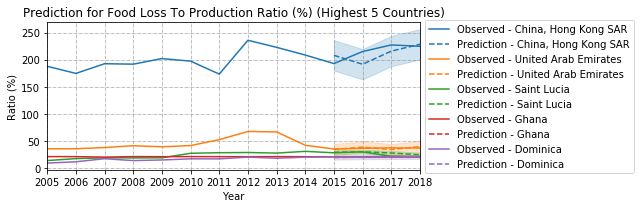

In [33]:
results_high5 = pred_eval_plot(df_use_f,
                               pd.to_datetime('2015-01-01'), 
                               pd.to_datetime('2018-01-01'),
                               high5_add,
                               '2005',
                               'Highest_5_Countries')

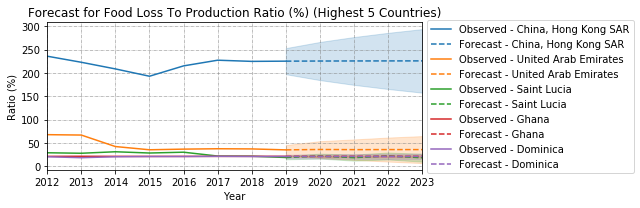

In [34]:
forecast_plot(df_use_f, 
              results_high5, 
              5, 
              high5_add, 
              '2012',
              'Highest_5_Countries')

For the prediction of Russian Federation_Total_ratio, MSE = 0.0048, RMSE = 0.0692 
For the prediction of Romania_Total_ratio, MSE = 0.0309, RMSE = 0.1757 
For the prediction of Hungary_Total_ratio, MSE = 0.1929, RMSE = 0.4392 
For the prediction of Latvia_Total_ratio, MSE = 0.0817, RMSE = 0.2859 
For the prediction of Malaysia_Total_ratio, MSE = 0.003, RMSE = 0.0544 


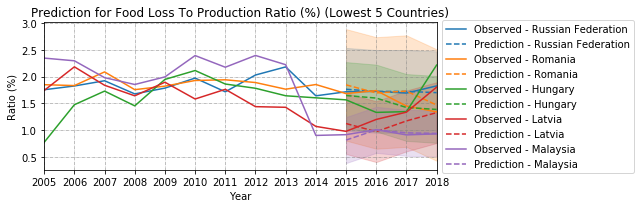

In [35]:
results_low5 = pred_eval_plot(df_use_f,
                             pd.to_datetime('2015-01-01'), 
                             pd.to_datetime('2018-01-01'),
                             low5_add,
                             '2005',
                             'Lowest_5_Countries')

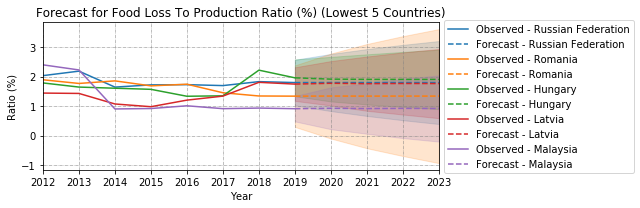

In [36]:
forecast_plot(df_use_f, 
              results_low5, 
              5, 
              low5_add, 
              '2012',
              'Lowest_5_Countries')

#### Modelling and Generate Seperate Plots

In [55]:
# seperate images: plot the prediction
def sp_pred_eval_plot(df_use_f, 
                  t_start=pd.to_datetime('2015-01-01'), 
                  t_end=pd.to_datetime('2018-01-01'), 
                  col_names=["China, mainland_P_ratio", "India_P_ratio"], 
                  start_year='2000',
                  savepic=''):
    
    all_results = []
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    ymax = 0
    for idx, col_name in enumerate(col_names):
    
        # Prediction
        results, _, _ = FL_tsa_model(df_use_f, col_name)
        all_results.append(results)
        pred = results.get_prediction(start=t_start, end=t_end, dynamic=False)
        
        # fix the index for target column
        y_plot = df_use_f[col_name]
        y_plot.index = pd.DatetimeIndex(y_plot.index.values, freq=y_plot.index.inferred_freq)

        # evaluation
        y_forecasted = pred.predicted_mean
        y_truth = y_plot[-(len(y_forecasted)):]
        mse = ((y_forecasted - y_truth) ** 2).mean()
        print('For the prediction of {}, MSE = {}, RMSE = {} '.format(col_name, round(mse, 4), round(np.sqrt(mse), 4)))

        # data prep
        y = pd.DataFrame(y_plot[start_year:])
        ymax = max(ymax, max(y[col_name].tolist()))
        y["Year"] = list(range(int(start_year), 2019))

        y_pred = pd.DataFrame(pred.predicted_mean)
        y_pred = y_pred.rename(columns={0: col_name})
        ymax = max(ymax, max(y_pred[col_name].tolist()))
        y_pred["Year"] = list(range(2019-len(y_pred), 2019))

        pred_ci = pred.conf_int()
        y_pred_ci = pd.DataFrame(pred_ci)
        y_pred_ci["Year"] = list(range(2019-len(y_pred_ci), 2019))

        # plot
        plt.figure(figsize=(6, 2.5))

        plt.plot(y["Year"], 
                 y[col_name],
                 color=color_list[idx],
                 label='Observed - ' + col_name[:-12])
        plt.plot(y_pred["Year"], 
                 y_pred[col_name],
                 color=color_list[idx],
                 linestyle='dashed',                    
                 label='Prediction - ' + col_name[:-12])
#         plt.fill_between(y_pred_ci["Year"],
#                          y_pred_ci.iloc[:, 0],
#                          y_pred_ci.iloc[:, 1], 
#                          color=color_list[idx],
#                          alpha=.2)
        
        plt.xticks(y["Year"])
        plt.xlabel('Year')
        plt.ylabel('Ratio (%)')
        plt.xlim([int(start_year), 2018])
    
        flag_name = None
        flag = col_names[0].split('_')[1]
        if flag == "P":
            flag_name = "Perishable"
        elif flag == "NP":
            flag_name = "Non-perishable"
        else:
            flag_name = flag

        plt.title("Prediction for Food Loss To Production Ratio (%) ({})".format(col_name[:-12]))
#         plt.legend(loc='upper right', bbox_to_anchor = (1, 1))
        plt.legend()
        plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
        plt.figtext(0.14, 0.56, 'RMSE = {}'.format(round(np.sqrt(mse), 2)), \
                    bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
        plt.tight_layout()
        plt.savefig("./[fig]/{}_Prediction.png".format(col_name[:-12]), bbox_inches='tight')
        plt.show()

    return all_results
    

In [56]:
def sp_forecast_plot(df_use_f, 
                  all_results, 
                  stepsize=5, 
                  col_names=["China, mainland_P_ratio", "India_P_ratio"], 
                  start_year='2000',
                  savepic=''):
    
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

    ymax = 0
    for idx, col_name in enumerate(col_names):
        
        results = all_results[idx]
        
        # forecast
        pred_uc = results.get_forecast(steps=stepsize)
        pred_ci = pred_uc.conf_int()
        
        # fix the index for target column
        y_plot = df_use_f[col_name]
        y_plot.index = pd.DatetimeIndex(y_plot.index.values, freq = y_plot.index.inferred_freq)

        # data prep
        y = pd.DataFrame(y_plot[start_year:])
        ymax = max(ymax, max(y[col_name].tolist()))
        y["Year"] = list(range(int(start_year), 2019))

        y_pred = pd.DataFrame(pred_uc.predicted_mean)
        y_pred = y_pred.rename(columns={0: col_name})
        ymax = max(ymax, max(y_pred[col_name].tolist()))
        y_pred["Year"] = list(range(2019, 2019 + stepsize))
        
        new_y = pd.concat([y, y_pred])
        new_y["Year"] = list(range(int(start_year), 2019 + stepsize))
        
        y_pred_ci = pd.DataFrame(pred_ci)
        y_pred_ci["Year"] = list(range(2019, 2019 + stepsize))

        # plot
        plt.figure(figsize=(6, 2.5))

        plt.plot(new_y["Year"][:'2019'], 
                 new_y[col_name][:'2019'],
                 color=color_list[idx],
                 label='Observed - ' + col_name[:-12])
        plt.plot(y_pred["Year"], 
                 y_pred[col_name], 
                 color=color_list[idx],
                 linestyle='dashed',      
                 label='Forecast - ' + col_name[:-12])
#         plt.fill_between(y_pred_ci["Year"],
#                          y_pred_ci.iloc[:, 0],
#                          y_pred_ci.iloc[:, 1], 
#                          color=color_list[idx],
#                          alpha=.2)
        
        plt.xticks(new_y["Year"])
        plt.xlabel('Year')
        plt.ylabel('Ratio (%)')
        plt.xlim([int(start_year), 2018 + stepsize])

        flag_name = None
        flag = col_names[0].split('_')[1]
        if flag == "P":
            flag_name = "Perishable"
        elif flag == "NP":
            flag_name = "Non-perishable"
        else:
            flag_name = flag

        plt.title("Forecast for Food Loss To Production Ratio (%) ({})".format(col_name[:-12]))
#         plt.legend(loc='upper right', bbox_to_anchor = (1, 1))
        plt.legend()
        plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
        plt.tight_layout()
        plt.savefig("./[fig]/{}_Forecast.png".format(col_name[:-12]), bbox_inches='tight')
        plt.show()


In [57]:
def sp_forecast_plot2(df_use_f, 
                  all_results, 
                  stepsize=5, 
                  col_names=["China, mainland_P_ratio", "India_P_ratio"], 
                  start_year='2000',
                  savepic=''):
    
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

    ymax = 0
    for idx, col_name in enumerate(col_names):
        
        results = all_results[idx]
        
        # forecast
        pred_uc = results.get_forecast(steps=stepsize)
        pred_ci = pred_uc.conf_int()
#         print(pred_ci)
        
        # fix the index for target column
        y_plot = df_use_f[col_name]
        y_plot.index = pd.DatetimeIndex(y_plot.index.values, freq = y_plot.index.inferred_freq)

        # data prep
        ymax = -999
        ymin = 999
        yplus = 0
        
        y = pd.DataFrame(y_plot[start_year:])
        ymax = max(ymax, max(y[col_name].tolist()))
        ymin = min(ymin, min(y[col_name].tolist()))
        y["Year"] = list(range(int(start_year), 2019))

        y_pred = pd.DataFrame(pred_uc.predicted_mean)
        y_pred = y_pred.rename(columns={0: col_name})
        ymax = max(ymax, max(y_pred[col_name].tolist()))
        ymin = min(ymin, min(y_pred[col_name].tolist()))
        y_pred["Year"] = list(range(2019, 2019 + stepsize))
        
        new_y = pd.concat([y, y_pred])
        new_y["Year"] = list(range(int(start_year), 2019 + stepsize))
        
        y_pred_ci = pd.DataFrame(pred_ci)
        y_pred_ci["Year"] = list(range(2019, 2019 + stepsize))

        yplus = ymax-ymin
        
        # plot        
        plt.figure(figsize=(6, 2.5))

        plt.plot(new_y["Year"][:'2019'], 
                 new_y[col_name][:'2019'],
                 color=color_list[idx],
                 label='Observed - ' + col_name[:-12])
        plt.plot(y_pred["Year"], 
                 y_pred[col_name], 
                 color=color_list[idx],
                 linestyle='dashed',      
                 label='Forecast - ' + col_name[:-12])
        plt.fill_between(y_pred_ci["Year"],
                         y_pred_ci.iloc[:, 0],
                         y_pred_ci.iloc[:, 1], 
                         color=color_list[idx],
                         alpha=.2)
        
        plt.xticks(new_y["Year"])
        plt.xlabel('Year')
        plt.ylabel('Ratio (%)')
        plt.xlim([int(start_year), 2018 + stepsize])
#         plt.ylim([ymin-yplus, ymax+yplus])

        flag_name = None
        flag = col_names[0].split('_')[1]
        if flag == "P":
            flag_name = "Perishable"
        elif flag == "NP":
            flag_name = "Non-perishable"
        else:
            flag_name = flag

        plt.title("Forecast for Food Loss To Production Ratio (%) ({})".format(col_name[:-12]))
#         plt.legend(loc='upper right', bbox_to_anchor = (1, 1))
        plt.legend()
        plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
        plt.tight_layout()
        plt.savefig("./[fig]/{}_Forecast2.png".format(col_name[:-12]), bbox_inches='tight')
        plt.show()


For the prediction of China, Hong Kong SAR_Total_ratio, MSE = 230.4079, RMSE = 15.1792 


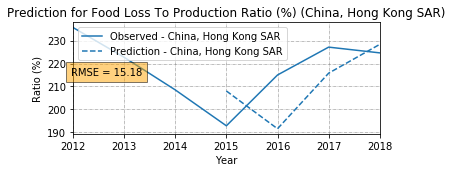

For the prediction of United Arab Emirates_Total_ratio, MSE = 5.5688, RMSE = 2.3598 


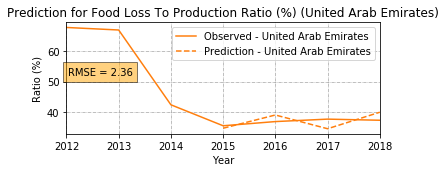

For the prediction of Saint Lucia_Total_ratio, MSE = 12.1913, RMSE = 3.4916 


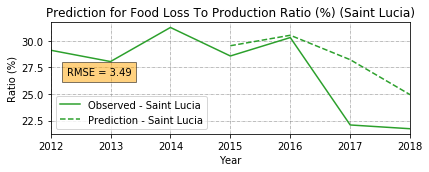

For the prediction of Ghana_Total_ratio, MSE = 0.0182, RMSE = 0.1351 


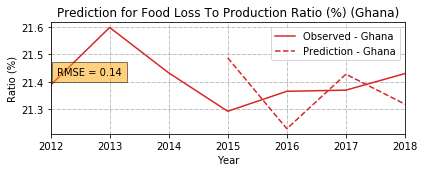

For the prediction of Dominica_Total_ratio, MSE = 0.5607, RMSE = 0.7488 


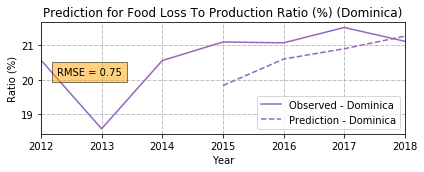

In [58]:
sp_results_high5 = sp_pred_eval_plot(df_use_f,
                               pd.to_datetime('2015-01-01'), 
                               pd.to_datetime('2018-01-01'),
                               high5_add,
                               '2012')

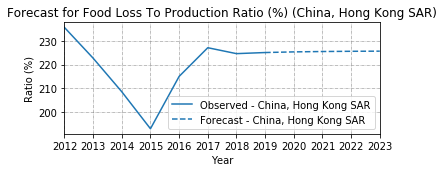

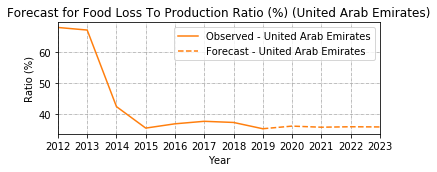

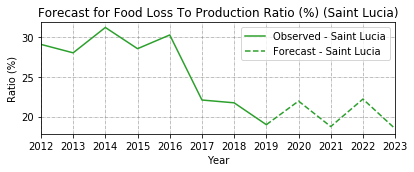

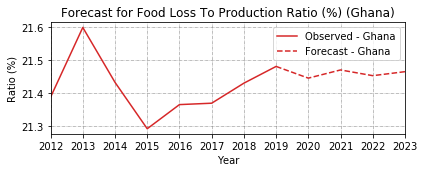

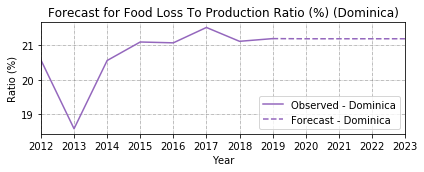

In [59]:
sp_forecast_plot(df_use_f, 
              sp_results_high5, 
              5, 
              high5_add, 
              '2012')

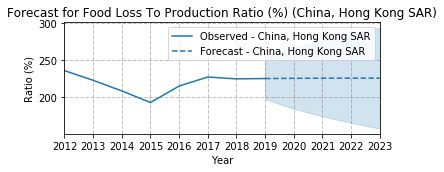

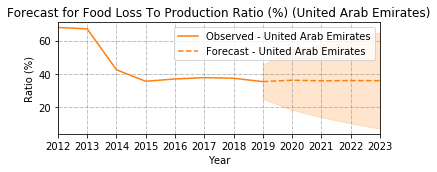

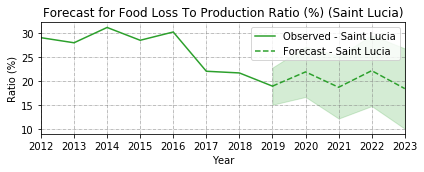

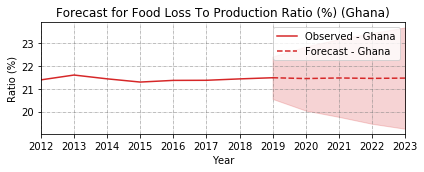

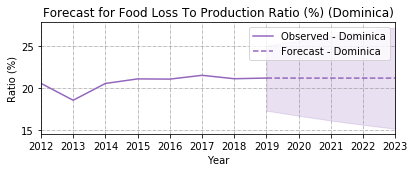

In [60]:
sp_forecast_plot2(df_use_f, 
              sp_results_high5, 
              5, 
              high5_add, 
              '2012')

For the prediction of Russian Federation_Total_ratio, MSE = 0.0048, RMSE = 0.0692 


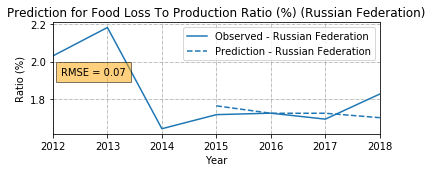

For the prediction of Romania_Total_ratio, MSE = 0.0309, RMSE = 0.1757 


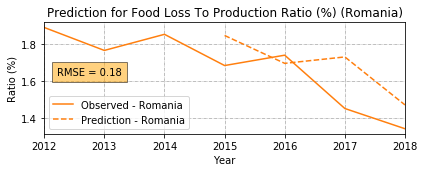

For the prediction of Hungary_Total_ratio, MSE = 0.1929, RMSE = 0.4392 


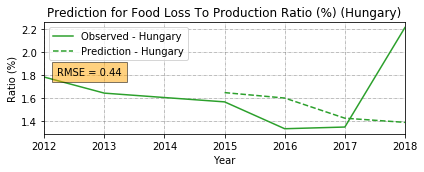

For the prediction of Latvia_Total_ratio, MSE = 0.0817, RMSE = 0.2859 


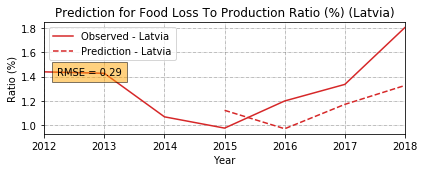

For the prediction of Malaysia_Total_ratio, MSE = 0.003, RMSE = 0.0544 


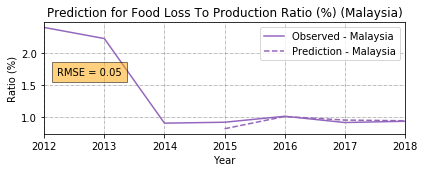

In [61]:
sp_results_low5 = sp_pred_eval_plot(df_use_f,
                             pd.to_datetime('2015-01-01'), 
                             pd.to_datetime('2018-01-01'),
                             low5_add,
                             '2012')

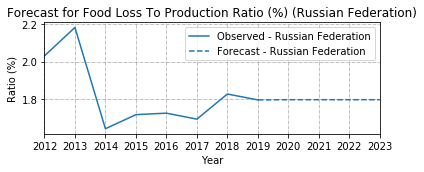

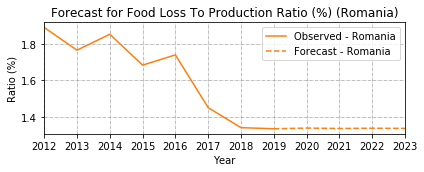

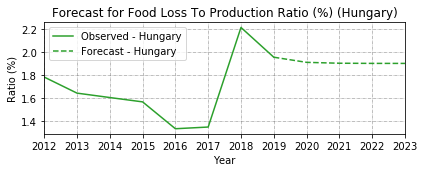

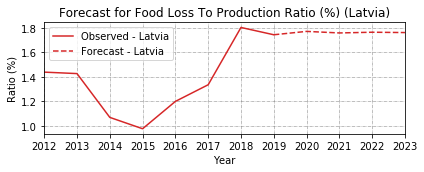

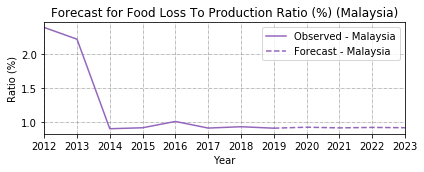

In [62]:
sp_forecast_plot(df_use_f, 
              sp_results_low5, 
              5, 
              low5_add, 
              '2012')

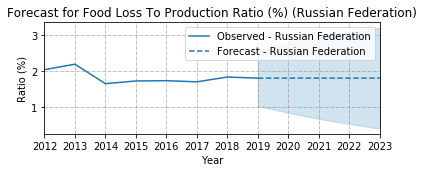

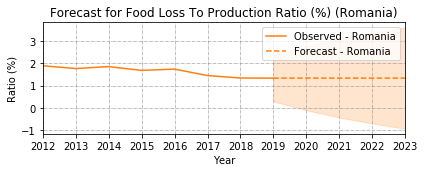

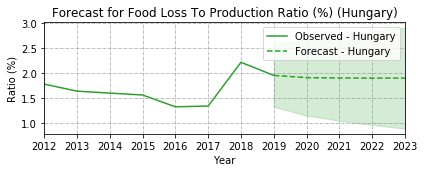

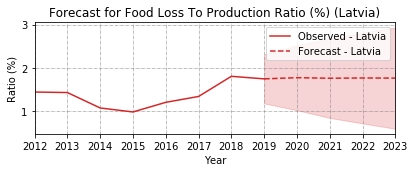

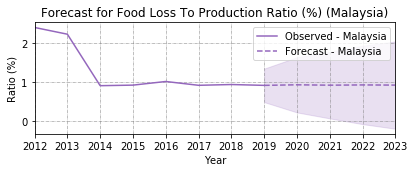

In [63]:
sp_forecast_plot2(df_use_f, 
              sp_results_low5, 
              5, 
              low5_add, 
              '2012')